# 4.5 权重衰减
- **目录**
  - 4.5.1 高维线性回归
  - 4.5.2 从零开始实现
    - 4.5.2.1 初始化模型参数
    - 4.5.2.2 定义$L_2$范数惩罚
    - 4.5.2.3 定义训练代码实现
    - 4.5.2.4 忽略正则化直接训练
    - 4.5.2.5 使用权重衰减
  - 4.5.3 简洁实现

前一节我们描述了过拟合的问题，本节我们将介绍一些<b>正则化模型</b>的技术。
我们总是可以通过去收集更多的训练数据来缓解过拟合。
但这可能成本很高，耗时颇多，或者完全超出我们的控制，因而在短期内不可能做到。
**假设我们已经拥有尽可能多的高质量数据，我们便可以将重点放在正则化技术上**。

回想一下，在 4.4节多项式回归的例子中，
我们可以通过调整拟合多项式的阶数来限制模型的容量。
实际上，**限制特征的数量是缓解过拟合的一种常用技术**。
然而，简单地丢弃特征对于这项工作来说可能过于生硬。
我们继续思考多项式回归的例子，考虑高维输入可能发生的情况。
<font color='red'>**多项式对多变量数据的自然扩展称为单项式（monomials），也可以说是变量幂的乘积**。（即：
    多项式对多变量数据的扩展是通过单项式来实现的，比如$x_1^2 x_2$这个单项式就有两个变量。)</font>
单项式的阶数是幂的和。
例如，$x_1^2 x_2$和$x_3 x_5^2$都是3次单项式。

注意，随着阶数$d$的增长，带有阶数$d$的项数迅速增加。
给定$k$个变量，阶数$d$（即$k$多选$d$）的个数为
${{k - 1 + d} \choose {k - 1}}=\frac{(k - 1 + d)!}{(k - 1)! \cdot d!}$。
即使是阶数上的微小变化，比如从$2$到$3$，
也会显著增加我们模型的复杂性。
因此，我们经常需要一个更细粒度的工具来调整函数的复杂性。

- **要点：**
  - 为了缓解过拟合，我们可以使用正则化技术。
  - 收集更多训练数据可能成本很高，耗时颇多，或者完全超出我们的控制，因此我们可以将重点放在正则化技术上。
  - 在多项式回归中，我们可以通过调整多项式的阶数来限制模型容量。
  - 限制特征数量是缓解过拟合的一种常用技术，但简单地丢弃特征可能过于生硬。
  - 单项式是多项式对多变量数据的自然扩展，也称为变量幂的乘积。
  - 单项式的阶数是幂的和。例如$x_1^2 x_2$和$x_3 x_5^2$都是3次单项式。
  - 随着阶数$d$的增长，带有阶数$d$的项数迅速增加。
  - 给定$k$个变量，阶数$d$（即$k$多选$d$）的个数为${k - 1 + d} \choose {k - 1}$。
  - 即使是阶数上的微小变化，比如从$2$到$3$，也会显著增加我们模型的复杂性。
  - 需要一个更细粒度的工具来调整函数的复杂性。

在2.3节中已经描述了$L_2$范数和$L_1$范数，
它们是更为一般的$L_p$范数的特殊情况。

在训练参数化机器学习模型时，
**权重衰减（weight decay）** 是最广泛使用的正则化的技术之一，
它通常也被称为$L_2$**正则化**。
这项技术通过函数与零的距离来衡量函数的复杂度，
因为在所有函数$f$中，函数$f = 0$（所有输入都得到值$0$）
在某种意义上是最简单的。
但是我们应该如何精确地测量一个函数和零之间的距离呢？

一种简单的方法是通过线性函数
$f(\mathbf{x}) = \mathbf{w}^\top \mathbf{x}$
中的**权重向量的某个范数来度量其复杂性**，
例如$\| \mathbf{w} \|^2$。
要保证权重向量比较小，
最常用方法是将其范数作为**惩罚项**加到最小化损失的问题中。
将原来的训练目标**最小化训练标签上的预测损失**，
调整为**最小化预测损失和惩罚项之和**。
现在，如果我们的权重向量增长的太大，
我们的学习算法可能会更集中于最小化权重范数$\| \mathbf{w} \|^2$。
这正是我们想要的。
让我们回顾一下 3.1节中的线性回归例子。
我们的损失由下式给出：

$$L(\mathbf{w}, b) = \frac{1}{n}\sum_{i=1}^n \frac{1}{2}\left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right)^2. \tag{4.5.1}$$

回想一下，$\mathbf{x}^{(i)}$是样本$i$的特征，
$y^{(i)}$是样本$i$的标签，
$(\mathbf{w}, b)$是权重和偏置参数。
为了惩罚权重向量的大小，
我们必须以某种方式在损失函数中添加$\| \mathbf{w} \|^2$，
但是模型应该如何平衡这个新的额外惩罚的损失？
实际上，我们通过**正则化常数**$\lambda$来描述这种权衡，
这是一个非负超参数，我们使用验证数据拟合：

$$L(\mathbf{w}, b) + \frac{\lambda}{2} \|\mathbf{w}\|^2, \tag{4.5.2}$$
对于$\lambda = 0$，我们恢复了原来的损失函数。
对于$\lambda > 0$，我们限制$\| \mathbf{w} \|$的大小。
这里我们仍然除以$2$：当我们取一个二次函数的导数时，
$2$和$1/2$会抵消，以确保更新表达式看起来既漂亮又简单。
你可能会想知道为什么我们使用平方范数而不是标准范数（即欧几里得距离）？
我们这样做是为了便于计算。
通过平方$L_2$范数，我们去掉平方根，留下权重向量每个分量的平方和。
这使得惩罚的**导数很容易计算：导数的和等于和的导数。**

此外，你可能会问为什么我们首先使用$L_2$范数，而不是$L_1$范数。
事实上，这个选择在整个统计领域中都是有效的和受欢迎的。
$L_2$正则化线性模型构成经典的**岭回归（ridge regression）**算法，
$L_1$正则化线性回归是统计学中类似的基本模型，
通常被称为**套索回归（lasso regression）**。
**使用$L_2$范数的一个原因是它对权重向量的大分量施加了巨大的惩罚。
这使得我们的学习算法偏向于在大量特征上均匀分布权重的模型。
在实践中，这可能使它们对单个变量中的观测误差更为稳定。
相比之下，$L_1$惩罚会导致模型将权重集中在一小部分特征上，
而将其他权重清除为零。**
这称为**特征选择（feature selection）**，这可能是其他场景下需要的。

使用与 3.1.10节中的相同符号，
$L_2$正则化回归的小批量随机梯度下降更新如下式：

$$
\begin{aligned}
\mathbf{w} & \leftarrow \left(1- \eta\lambda \right) \mathbf{w} - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \mathbf{x}^{(i)} \left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right).
\end{aligned}  \tag{4.5.3}
$$
（其中其中$\mathcal{B}$表示一个小批量索引集合，$|\mathcal{B}|$表示小批量的大小。）
根据之前章节所讲的，我们根据估计值与观测值之间的差异来更新$\mathbf{w}$。
然而，我们同时也在试图将$\mathbf{w}$的大小缩小到零。
这就是为什么这种方法有时被称为**权重衰减**。
我们仅考虑惩罚项，优化算法在训练的每一步**衰减**权重。
与特征选择相比，权重衰减为我们提供了一种连续的机制来调整函数的复杂度。
**较小的$\lambda$值对应较少约束的$\mathbf{w}$，
而较大的$\lambda$值对$\mathbf{w}$的约束更大。**（可参考本节最后部分的公式推导过程）

是否对相应的偏置$b^2$进行惩罚在不同的实践中会有所不同，
在神经网络的不同层中也会有所不同。
通常，网络输出层的偏置项不会被正则化。

<center><img src='../img/4_5_1.png' width=500px></center>
<center>图4.5.1 模型L1正则化与L2正则化</center>

- 可参考《统计学习导论 基于R应用》，《最优化导论》
<center><img src='../img/4_5_2.png' width=300px><img src='../img/4_5_4.png' width=300px></center>

- **要点**：
  - 权重衰减（weight decay）是机器学习模型训练中最广泛使用的正则化技术之一，也称为$L_2$正则化。这项技术通过函数与零的距离来衡量函数的复杂度。
  - 为了惩罚权重向量的大小，我们将其范数作为惩罚项加到最小化损失的问题中。调整后的训练目标是最小化预测损失和惩罚项之和。
  - 我们通过正则化常数$\lambda$来平衡损失函数与惩罚项之间的关系。$\lambda$是一个非负超参数，通过验证数据进行拟合。
  - $L_2$正则化线性模型构成经典的岭回归算法，而$L_1$正则化线性回归是统计学中类似的基本模型，通常被称为Lasso回归。
  - $L_2$正则化回归的小批量随机梯度下降更新如下：
  $$
\begin{aligned}
\mathbf{w} & \leftarrow \left(1- \eta\lambda \right) \mathbf{w} - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \mathbf{x}^{(i)} \left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right).
\end{aligned}
$$
  其中$\mathcal{B}$表示一个小批量索引集合，$|\mathcal{B}|$表示小批量的大小。
  - 权重衰减的优化算法在训练的每一步都在试图将$\mathbf w$的大小缩小到零，与特征选择相比，权重衰减为我们提供了一种连续的机制来调整函数的复杂度。
  - 是否对相应的偏置$b^2$进行惩罚在不同的实践中会有所不同，在神经网络的不同层中也会有所不同。通常，**网络输出层的偏置项不会被正则化**。此处之所以为$b^2$，是因为上述公式采用$L_2$惩罚，即对$b^2$进行惩罚。当然，按照此处论述，很多情况下是不对偏置进行正则化和惩罚的。


## 4.5.1 高维线性回归

- 通过一个简单的例子来演示权重衰减。

In [1]:
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l

- 首先，我们[**像以前一样生成一些数据**]，生成公式如下：

**$$y = 0.05 + \sum_{i = 1}^d 0.01 x_i + \epsilon \text{ where }
\epsilon \sim \mathcal{N}(0, 0.01^2).$$**

- 选择标签是关于输入的线性函数。
标签同时被均值为0，标准差为0.01高斯噪声破坏。
- 为了使过拟合的效果更加明显，可以将问题的维数增加到$d = 200$，
并使用一个只包含20个样本的小训练集。


In [2]:
n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5
true_w, true_b = torch.ones((num_inputs, 1)) * 0.01, 0.05
train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train=False)

In [7]:
train_data[0].shape,train_data[1].shape

(torch.Size([20, 200]), torch.Size([20, 1]))

## 4.5.2 从零开始实现

- 从头开始实现权重衰减，只需将$L_2$的平方惩罚添加到原始目标函数中。

### 4.5.2.1 初始化模型参数
- 定义一个函数来随机初始化模型参数。


In [3]:
def init_params():
    w = torch.normal(0, 1, size=(num_inputs, 1), requires_grad=True)
    b = torch.zeros(1, requires_grad=True)
    return [w, b]

### 4.5.2.2 定义$L_2$范数惩罚

- 实现这一惩罚最方便的方法是对所有项求平方后并将它们求和。

In [4]:
def l2_penalty(w):
    return torch.sum(w.pow(2)) / 2

### 4.5.2.3 定义训练代码实现

- 下面的代码将模型拟合训练数据集，并在测试数据集上进行评估，前面几节中的实践中，**线性网络模型**和**平方损失**没有变化。
- 通过`d2l.linreg`和`d2l.squared_loss`导入它们，唯一的变化是损失现在包括了惩罚项。


In [5]:
def train(lambd):
    w, b = init_params()
    net, loss = lambda X: d2l.linreg(X, w, b), d2l.squared_loss
    num_epochs, lr = 100, 0.003
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            # 增加了L2范数惩罚项，
            # 广播机制使l2_penalty(w)成为一个长度为batch_size的向量
            '''
            在此处进行正则化,l2惩罚，只对权重，不对偏置。其实就是岭回归
            '''
            l = loss(net(X), y) + lambd * l2_penalty(w)
            l.sum().backward()
            d2l.sgd([w, b], lr, batch_size)
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
                                     d2l.evaluate_loss(net, test_iter, loss)))
    print('w的L2范数是：', torch.norm(w).item())
    print('w等于0的元素个数：',torch.sum(w<0.001))

### 4.5.2.4 忽略正则化直接训练

- 用`lambd = 0`禁用权重衰减后运行这个代码。
  - 注意，这里训练误差有了减少，但测试误差没有减少，
  - 这意味着出现了严重的过拟合。


w的L2范数是： 12.859582901000977
w等于0的元素个数： tensor(98)


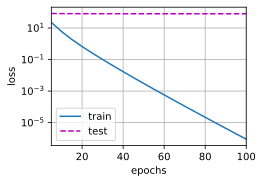

In [6]:
train(lambd=0)

### 4.5.2.5 使用权重衰减

- 使用权重衰减来运行代码。
  - 在这里训练误差增大，但测试误差减小。
  - 正是期望从正则化中得到的效果。


w的L2范数是： 0.35204067826271057
w等于0的元素个数： tensor(102)


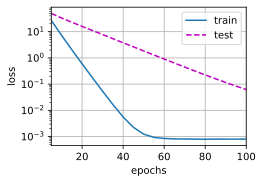

In [7]:
train(lambd=3)

## 4.5.3 **简洁实现**

- 深度学习框架为了便于我们使用权重衰减，将权重衰减集成到优化算法中，以便与任何损失函数结合使用。
- 这种集成还有计算上的好处，**允许在不增加任何额外的计算开销的情况下向算法中添加权重衰减**。
- 由于更新的权重衰减部分仅依赖于每个参数的当前值，因此优化器必须至少接触每个参数一次。
- 在下面的代码中，在实例化优化器时直接通过`weight_decay`指定权重衰减超参数。
  - 默认情况下，PyTorch同时衰减权重和偏置。 
  - 此处只为权重设置了weight_decay，所以偏置参数 𝑏 不会衰减。

In [8]:
def train_concise(wd):
    net = nn.Sequential(nn.Linear(num_inputs, 1))
    ## 对模型的权重与偏置都是用正态分布初始化
    for param in net.parameters():
        param.data.normal_()
    ## 均方误差损失，未降维
    loss = nn.MSELoss(reduction='none')
    num_epochs, lr = 100, 0.003
    # 偏置参数没有衰减
    trainer = torch.optim.SGD([
        {"params":net[0].weight,'weight_decay': wd},
        {"params":net[0].bias}], 
        lr=lr)
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            trainer.zero_grad()
            l = loss(net(X), y)
            ## 注意mean函数，求小批量的平均梯度
            l.mean().backward()
            trainer.step()
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1,
                         (d2l.evaluate_loss(net, train_iter, loss),
                          d2l.evaluate_loss(net, test_iter, loss)))
    print('w的L2范数：', net[0].weight.norm().item())

- 此图看起来和从零开始实现权重衰减时的图相同，但是此算法运行得更快，更容易实现。
- 对于更复杂的问题，此种算法的好处将变得更加明显。
- 后面内容将默认使用简单的启发式方法，即**在深层网络的所有层上应用权重衰减**。

w的L2范数： 12.423093795776367


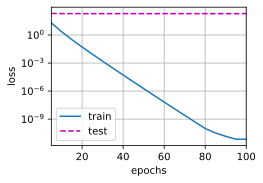

In [9]:
train_concise(0)

w的L2范数： 0.5665613412857056


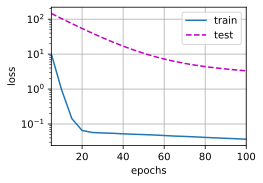

In [10]:
train_concise(3)

--------------

- **说明：** 
- **（1）何为“使用简单的启发式方法，即在深层网络的所有层上应用权重衰减”？**
  - 启发式"（heuristic）是指一种简化、有效且易于实现的方法。它通常基于经验或直观的判断来解决问题，而不是严格的理论证明。在深度学习中，权重衰减被认为是一种启发式方法，因为它通过对权重矩阵进行简单正则化来降低过拟合风险，从而提高模型泛化能力。
  - 权重衰减并没有严格保证会导致更好的泛化性能，但它已经在许多实际应用中证明了其有效性。因此，将其称为**启发式方法是因为它是一种基于实践经验和直观的解决方案，而非理论得出的最优解**。

  - 在深度学习中，上述结论指的是使用权重衰减作为一种简单的启发式方法来防止过拟合。

  - 问题背景：在深度学习任务中，过拟合是一个常见问题。过拟合是指模型在训练数据上表现很好，但在测试数据或新数据上表现较差。原因通常是模型过于复杂，以至于捕捉到了训练数据中的噪声。为了解决这个问题，需要采用正则化（Regularization）技术，其中一种就是权重衰减。

  - 权重衰减的含义：权重衰减是一种正则化手段，通过在损失函数中添加一个额外的项来惩罚较大的权重值。这样做的目的是**鼓励模型学习更简单、更平滑的函数，从而提高泛化能力**。

  - 数学表达：设损失函数为 $L$，权重矩阵为 $W$，那么加入权重衰减后的损失函数可以表示为：
    $$L' = L + λ * ∑(W_{ij}^2)$$
  其中，$λ$ 是一个超参数，控制着权重衰减的强度。权重衰减项是权重矩阵$ W $中所有元素的平方和。
  - 应用在深层网络的所有层：这个结论提倡在深度神经网络的每一层上都应用权重衰减。这意味着在计算损失函数时，我们需要将所有层的权重衰减项加入到总损失中。

  - **示例：** 假设我们有一个三层的全连接神经网络，输入层有 2 个节点，隐藏层有 3 个节点，输出层有 1 个节点:
    - (a) 初始化权重矩阵 $W1 (2\times3) 和 W2 (3\times1)$，并设置$λ$。
    - (b) 对于输入数据 $X$，计算前向传播得到预测值 y_pred。
    - (c) 计算损失函数 $L$（如均方误差）。
    - (d) 计算权重衰减项：$WD = λ * (∑(W1_{ij}^2) + ∑(W2_{ij}^2))$。
    - (e) 计算加入权重衰减后的损失函数 $L' = L + WD$。
    - (f) 使用梯度下降法或其他优化算法更新权重矩阵 $W1$ 和 $W2$。
    - (g) 重复步骤 (b) 至 (f)，直到满足收敛条件或达到最大迭代次数。

  - 通过在深度神经网络的所有层上应用权重衰减，我们可以有效地降低过拟合风险，并提高模型的泛化能力。

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

# 假设我们有一些训练数据和对应的标签
X_train = torch.tensor([[0.5, 0.3], [0.2, 0.1], [0.7, 0.8], [0.4, 0.6]])
y_train = torch.tensor([[0.9], [0.5], [1.0], [0.7]])

# 设置超参数
input_size = 2
hidden_size = 3
output_size = 1
learning_rate = 0.01
weight_decay_lambda = 0.001
num_epochs = 100

# 定义三层全连接神经网络
class ThreeLayerNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(ThreeLayerNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

model = ThreeLayerNN(input_size, hidden_size, output_size)

# 定义损失函数和优化器
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, weight_decay=weight_decay_lambda)

# 训练模型
for epoch in range(num_epochs):
    # 前向传播
    y_pred = model(X_train)

    # 计算损失
    loss = criterion(y_pred, y_train)

    # 反向传播
    optimizer.zero_grad()
    loss.backward()

    # 更新权重
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

print("Training finished.")

Epoch [10/100], Loss: 0.2307
Epoch [20/100], Loss: 0.1663
Epoch [30/100], Loss: 0.1233
Epoch [40/100], Loss: 0.0946
Epoch [50/100], Loss: 0.0754
Epoch [60/100], Loss: 0.0626
Epoch [70/100], Loss: 0.0541
Epoch [80/100], Loss: 0.0484
Epoch [90/100], Loss: 0.0446
Epoch [100/100], Loss: 0.0420
Training finished.


- **(2) 权重衰减的损失函数及其梯度下降算法的推导过程**
  - 最小化损失函数$L(\mathbf w)$，其中$\mathbf w$是模型参数（权重）。为了应用权重衰减，我们可以在原始损失函数上添加一个 $L2$ 范数正则项，乘以一个**非负超参数**（**权重衰减系数**）：
$$L'(\mathbf{w}) = L(\mathbf{w}) + \frac{\lambda}{2} ||\mathbf{w}||^2_2$$
    其中$||\mathbf{w}||^2_2$是是权重向量$\mathbf w$ 的 $L2$ 范数的平方，表示为：
$$||\mathbf{w}||^2_2 = \sum_{i=1}^{n} w_i^2$$
  现在我们的目标是最小化新的损失函数$L'(\mathbf{w})$。
  - 首先计算**损失函数关于权重的梯度**（推导过程附后）：
  $$\nabla L'(w) = \nabla L(w) + \lambda w$$
  - 在每次迭代中，我们根据梯度的方向更新权重：
  $$ w^{(t+1)} = w^{(t)} - \eta \nabla L'(w^{(t)})$$
  其中 $\eta$ 是学习率。
  - 将梯度替换为上面计算出的梯度表达式，得到：
  $$w^{(t+1)} = w^{(t)} - \eta (\nabla L(w^{(t)}) + \lambda w^{(t)})$$
  这个公式可以分解为两部分:
  $$w^{(t+1)} = (w^{(t)} - \eta \lambda w^{(t)}) - \eta \nabla L(w^{(t)}) = (1 - \eta \lambda)w^{(t)} - \eta \nabla L(w^{(t)})$$
  - 可以看到，在原始梯度下降的基础上，权重衰减引入了一个额外的项，使得在每次迭代时，权重都会乘以一个小于 1 的因子 $(1-\eta\lambda)$。这有助于抑制较大的权重值，从而使学习到的模型更简单，提高泛化能力。权重衰减通过这种方式在梯度下降中实现正则化。

- **(3) $||\mathbf{w}||^2_2$是权重向量$\mathbf w$ 的 $L2$ 范数的平方，其求导过程**
  - 为了求解这一部分关于权重 $\mathbf w$ 的梯度，我们可以**对每个权重分量 $w_i$ 分别求偏导数**。对于第 $i$ 个权重分量$ w_i$，我们有：
    $$\frac{\partial}{\partial w_i} (\frac{\lambda}{2} ||w||^2_2) = \frac{\partial}{\partial w_i} (\frac{\lambda}{2} \sum_{j=1}^{n} w_j^2)$$
  - 注意到在求和中，只有当 $j = i$ 时，$w_j$ 对 $w_i$ 的偏导数才不为零。因此，上述求和可以简化为：
  $$ \frac{\partial}{\partial w_i} (\frac{\lambda}{2} ||w||^2_2) = \frac{\partial}{\partial w_i} (\frac{\lambda}{2} w_i^2) = \lambda w_i$$
  - 现在我们已经知道 $L2$ 范数部分关于每个权重分量 $w_i$ 的偏导数，我们可以将这些偏导数组成一个关于权重向量 $\mathbf w$ 的梯度：
  $$\nabla (\frac{\lambda}{2} ||w||^2_2) = \lambda w$$
  - 最后，在计算损失函数关于权重的梯度时，我们需要将原始损失函数 $L(w)$ 关于权重的梯度与 $L2$ 范数部分的梯度相加：
  $$\nabla L'(w) = \nabla L(w) + \lambda w$$

- **（4） $||\mathbf{W}||^2_2$权重矩阵的求导过程**
  - 假设权重 $W$ 是一个矩阵，形状为 `(m, n)`。那么 $W$ 的 L2 范数（Frobenius 范数）定义为：
$$
||W||^2_F = \sum_{i=1}^{m} \sum_{j=1}^{n} W_{ij}^2
$$
  - 为了求取带有 L2 范数正则项的损失函数关于权重矩阵 `W` 的梯度，我们需要分别对每个元素 $W_{ij}$ 求偏导数。对于权重矩阵 $W$中的元素 $W_{ij}$，偏导数为：
$$
\frac{\partial}{\partial W_{ij}} (\frac{\lambda}{2} ||W||^2_F) = \frac{\partial}{\partial W_{ij}} (\frac{\lambda}{2} \sum_{p=1}^{m} \sum_{q=1}^{n} W_{pq}^2)
$$
注意到在求和中，只有当 `p = i` 且 `q = j` 时，$W_{pq}$ 对 $W_{ij}$ 的偏导数才不为零。因此，上述求和可以简化为：
$$
\frac{\partial}{\partial W_{ij}} (\frac{\lambda}{2} ||W||^2_F) = \frac{\partial}{\partial W_{ij}} (\frac{\lambda}{2} W_{ij}^2) = \lambda W_{ij}
$$
  - 现在我们已经知道 L2 范数部分关于每个权重矩阵元素 $W_{ij}$的偏导数。我们可以将这些偏导数组成一个与权重矩阵$W$相同形状的梯度矩阵：
$$
\nabla (\frac{\lambda}{2} ||W||^2_F) = \lambda W
$$
  - 最后，在计算损失函数关于权重矩阵的梯度时，我们需要将原始损失函数 $L(W)$ 关于权重矩阵的梯度与 L2 范数部分的梯度相加：
$$
\nabla L'(W) = \nabla L(W) + \lambda W
$$
  - 这就是权重矩阵（或张量）情况下的 L2 范数关于权重的梯度求解过程。这里的计算实际上是针对权重矩阵中的每个元素进行计算的。


## 小结

* 正则化是处理过拟合的常用方法：在训练集的损失函数中加入惩罚项，以降低学习到的模型的复杂度。
* 保持模型简单的一个特别的选择是使用$L_2$惩罚的权重衰减。这会导致学习算法更新步骤中的权重衰减。
* 权重衰减功能在深度学习框架的优化器中提供。
* 在同一训练代码实现中，不同的参数集可以有不同的更新行为。